# Range of the trajectory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy.optimize import root, fsolve

![ex_2.22.png](./ex_2.22.jpg)

Range in a linear medium:
$$ \frac{v_{y0} + v_{\text{ter}}}{v_{x0}} R + v_{\text{ter}} \tau \ \text{ln} \left ( 1 - \frac{R}{v_{x0} \tau} \right) = 0 $$

Range in vacuum (no drag):
$$
R_{\text{vac}} = \frac{2 v_{x0} v_{y0}}{g}
$$

In [3]:
v0 = 1
g = 1
vter = 1
tau = 1

In [28]:
# Maximum range in vacuum
theta_vac_max = np.radians(45)
R_vac_max = 2*v0**2*np.sin(theta_vac_max)*np.cos(theta_vac_max)/g
print(R_vac_max)

1.0


In [5]:
def Range(x, theta, v0, g, vter, tau):
    '''Non linear equation for the Range in a linear medium'''
    vx0 = v0*np.cos(theta)
    vy0 = v0*np.sin(theta)
    return (vy0 + vter)/vx0*x + vter*tau*np.log(1-x/(vx0*tau))

In [6]:
Range_wr = lambda x: Range(x, theta_vac_max, v0, g, vter, tau)

In [7]:
solution = fsolve(Range_wr, x0 = 0.4)

In [8]:
solution[0]

0.4909863592674413

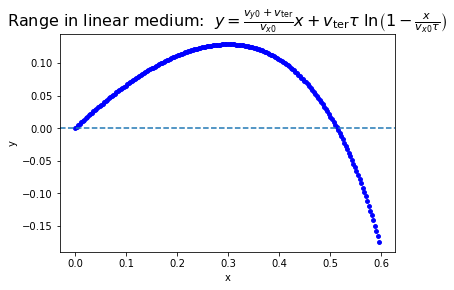

In [27]:
R = []
s = np.arange(0,0.6, 0.003)
for x in s:
    #print(z)
    y = Range_wr(x)
    plt.scatter(x, y, color = 'b', s = 15)
    if (y<0.001 and y>-0.003):
        R.append(x)
plt.axhline(y = 0, linestyle = '--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Range in linear medium:  $y = \frac{v_{y0} + v_{\mathrm{ter}}}{v_{x0}} x + v_{\mathrm{ter}} \tau \ \mathrm{ln} \left ( 1 - \frac{x}{v_{x0} \tau} \right)$',
         fontsize = 16)
plt.show()

In [10]:
# Value of the range for an initial angle of 45°
print(R)

[0.0, 0.492]


In [11]:
theta_range = np.arange(0.4,0.9, 0.1)
solution_theta = []
for theta in theta_range:
    Range_wr = lambda x: Range(x, theta, v0, g, vter, tau)
    solution = fsolve(Range_wr, x0 = 0.4)
    solution_theta.append(solution[0])

In [12]:
solutions_df = pd.DataFrame({
    'theta': theta_range,
    'solution': solution_theta})
solutions_df

,theta,solution
0,0.4,0.462867
1,0.5,0.499497
2,0.6,0.513623
3,0.7,0.508495
4,0.8,0.486905


The maximum should lie between theta = 0.5 and theta = 0.7, we thus shorten our range:

In [13]:
theta_range2 = np.arange(0.5,0.7, 0.01)
solution_theta2 = []
for theta in theta_range2:
    Range_wr = lambda x: Range(x, theta, v0, g, vter, tau)
    solution = fsolve(Range_wr, x0 = 0.4)
    solution_theta2.append(solution[0])

In [14]:
solutions_df2 = pd.DataFrame({
    'theta': theta_range2,
    'solution': solution_theta2})
solutions_df2

,theta,solution
0,0.50,0.499497
1,0.51,0.501864
2,0.52,0.504011
3,0.53,0.505939
4,0.54,0.507654
5,0.55,0.509158
6,0.56,0.510453
7,0.57,0.511545
8,0.58,0.512435
9,0.59,0.513127


In [29]:
# Angle corresponding to the maximum range in a linear medium
theta_range2[np.argmax(solution_theta2)], np.degrees(theta_range2[np.argmax(solution_theta2)])

(0.6200000000000001, 35.52338329811105)

The angle to attain the maximum range, given the initial conditions, is roughly $35.5°$, smaller than its vacuum anlogue $45°$. A shallower angle reduces flight time but it also reduces the time the object spends in air and thus the total drag.

In [16]:
def x_traj(t, v0, theta, tau, **kwargs):
    return v0*np.cos(theta)*tau*(1 - np.exp(-t/tau))

In [17]:
def y_traj(t, v0, theta, tau, vter, **kwargs):
    return (v0*np.sin(theta) + vter)*tau*(1 - np.exp(-t/tau)) - vter*t

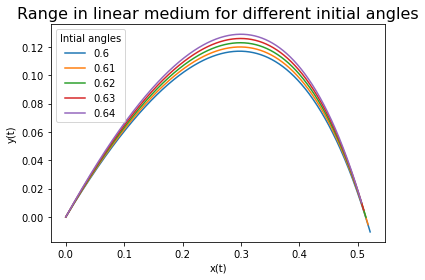

In [35]:
t = np.arange(0,1,0.001)
for theta in [0.60, 0.61, 0.62, 0.63, 0.64]:
    x = x_traj(t = t, theta=theta, v0 = v0, tau=tau)
    y = y_traj(t=t, theta=theta, v0=v0, tau=tau, vter=vter)
    plt.plot(x,y, label = f'{round(theta,2)}')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(r'Range in linear medium for different initial angles',
         fontsize = 16)
plt.legend(title = 'Intial angles')
plt.show()